In [1]:
import sys
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Monkey patch np.float and np.int (used in madmom)
np.float = float
np.int = int

sys.path.insert(0, '../')
import lib.feature as ft

In [2]:
# Load the audio file 
audio_path = '../data/track/jwmtj61_00_12t6wktp.wav'
audio, sr = librosa.load(audio_path)

In [3]:
# Data on this track from tracks.csv
tracks = pd.read_csv('../data/meta/tracks.csv')
track = tracks.query("track_id == '12t6wktp' and mix_id == 'jwmtj61'").squeeze()

print(f"Mix ID: {track['mix_id']}")
print(f"Track ID: {track['track_id']}")
print(f"BPM: {track['bpm']}")
print(f"Key: {track['key']}")
print(f"Audio Sample Rate: {track['audio_sr']}")
print(f"Audio Length: {track['audio_length']} seconds")
print(f"Audio Size: {track['audio_size']} MB")

Mix ID: jwmtj61
Track ID: 12t6wktp
BPM: 122.4489795918
Key: Eb major
Audio Sample Rate: 44100
Audio Length: 202.9303401361 seconds
Audio Size: 3.097495079 MB


Beat Activations:
[0.00828604 0.00400105 0.00224828 ... 0.00321834 0.00648628 0.01376116]
Length of array: 20294


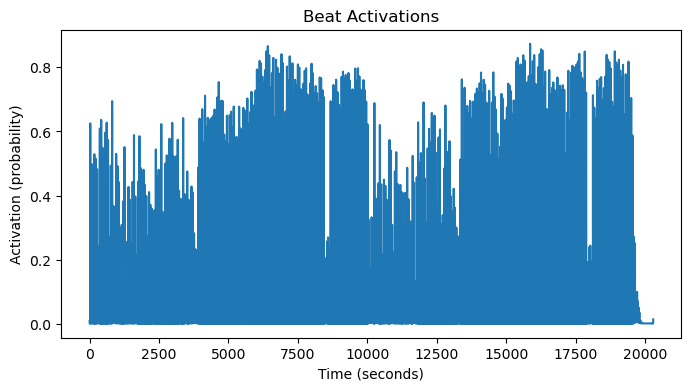

In [4]:
# Compute beat activations
beat_activations = ft.beat_activations(audio_path)

print('Beat Activations:')
print(beat_activations)
print(f"Length of array: {len(beat_activations)}")

plt.figure(figsize=(8, 4))
plt.plot(beat_activations)
plt.title('Beat Activations')
plt.xlabel('Time (seconds)')
plt.ylabel('Activation (probability)')
plt.show()

First 12 values of beat_times: [0.25 0.74 1.23 1.72 2.21 2.7  3.19 3.69 4.18 4.67 5.16 5.66]
Difference between these beat_times: [0.49 0.49 0.49 0.49 0.49 0.49 0.5  0.49 0.49 0.49 0.5 ]


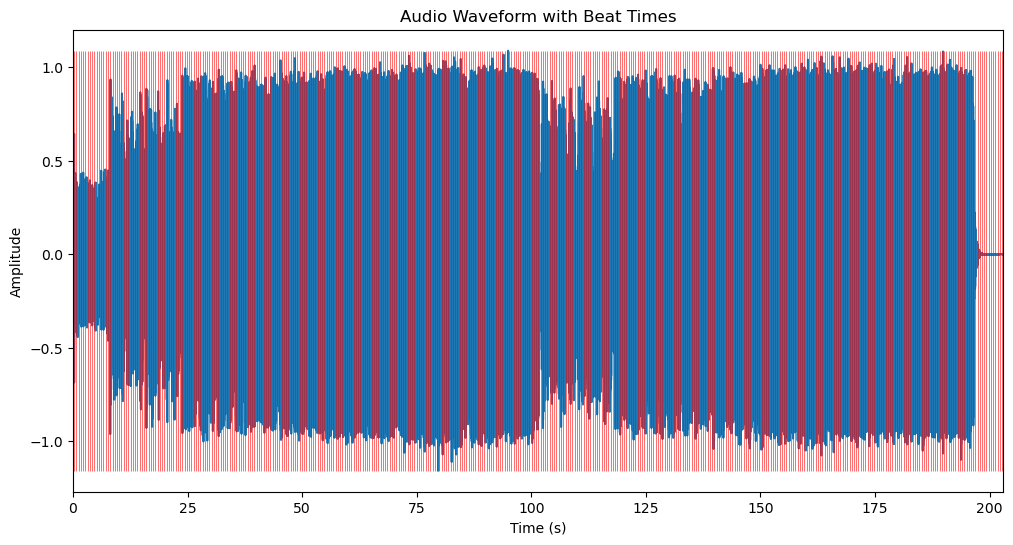

In [19]:
# Compute beats
beat_times = ft.beat_times(audio_path)
print("First 12 values of beat_times:", beat_times[:12])
print("Difference between these beat_times:", np.diff(beat_times[:12]))

# Plot the audio waveform
plt.figure(figsize=(12, 6))
plt.plot(np.arange(len(audio)) / sr, audio)

# Create thin vertical lines at the beat times
plt.vlines(beat_times, np.min(audio), np.max(audio), colors='r', linestyles='solid', linewidths=0.4)

# Set the x-axis limits to the duration of the audio file
plt.xlim(0, len(audio) / sr)

# Set the title and labels
plt.title('Audio Waveform with Beat Times')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Show the plot
plt.show()

In [ ]:
# Compute MFCCs
mfccs = mfcc(audio_path)
print("\nMFCCs:")
print(mfccs)

# Compute beat MFCCs
beat_mfccs = beat_mfcc(audio_path)
print("\nBeat MFCCs:")
print(beat_mfccs)

# Compute chroma CENS
chroma_cens = chroma_cens(audio_path)
print("\nChroma CENS:")
print(chroma_cens)

# Compute beat chroma CENS
beat_chroma_cens = beat_chroma_cens(audio_path)
print("\nBeat Chroma CENS:")
print(beat_chroma_cens)

# Plot the beat activations and beats
plt.figure(figsize=(12, 6))
plt.plot(beat_activations)
plt.plot(beats, 'ro')
plt.title('Beat Activations and Beats')
plt.xlabel('Time')
plt.ylabel('Activation')
plt.show()

# Plot the MFCCs
plt.figure(figsize=(12, 6))
plt.imshow(mfccs, cmap='inferno', origin='lower')
plt.title('MFCCs')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

# Plot the beat MFCCs
plt.figure(figsize=(12, 6))
plt.imshow(beat_mfccs, cmap='inferno', origin='lower')
plt.title('Beat MFCCs')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

# Plot the chroma CENS
plt.figure(figsize=(12, 6))
plt.imshow(chroma_cens, cmap='inferno', origin='lower')
plt.title('Chroma CENS')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

# Plot the beat chroma CENS
plt.figure(figsize=(12, 6))
plt.imshow(beat_chroma_cens, cmap='inferno', origin='lower')
plt.title('Beat Chroma CENS')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()